A logistic regression algorithm used to predict whether an individual will get heart disease in the future. This was made using this AI course: https://www.youtube.com/watch?v=EYQnyfLeI8g&list=PLqg…

In [1]:
import numpy as np

In [2]:
X = np.load("/kaggle/input/heart-disease-prediction-simplified/X.npy")
Y = np.load("/kaggle/input/heart-disease-prediction-simplified/y.npy")

In [3]:
print(X.shape)
print(Y.shape)

(4238, 5)
(4238,)


In [4]:
print("male age has_high_BP systolic_BP diastolic_BP")
print(X)

male age has_high_BP systolic_BP diastolic_BP
[[  1.   39.    0.  106.   70. ]
 [  0.   46.    0.  121.   81. ]
 [  1.   48.    0.  127.5  80. ]
 ...
 [  0.   48.    0.  131.   72. ]
 [  0.   44.    0.  126.5  87. ]
 [  0.   52.    0.  133.5  83. ]]


In [5]:
print(Y)

[0 0 0 ... 0 0 0]


In [6]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [7]:
def feedforward(X,theta):
    z = np.dot(X,theta) #Weighted Input
    a = sigmoid(z) #Activation
    pred = np.round(a) #Rounds to 0 or 1
    return pred

X_temp = X[0] #Select 1st row
num_features = X_temp.shape[-1] #Num columns = num features
print(f"The number of features is {num_features}.")

theta = np.random.randn(num_features)
print(theta)

pred = feedforward(X_temp,theta)
print(pred)

The number of features is 5.
[ 0.20632436  1.09496208 -1.02938907 -1.40051255 -0.48636551]
0.0


In [8]:
def cost_function(X,Y,theta):
    pred = feedforward(X,theta)
    m = Y.shape[0]
    
    diff_squared = (pred - Y) ** 2
    avg_per_example = np.sum(diff_squared) / m
    return avg_per_example

cost = cost_function(X,Y,theta)
print(cost)


0.1519584709768759


In [9]:
def gradient_vectorized(pred,X,Y):
    m = Y.shape[0]
    
    cost_by_pred = 2 * (pred - Y) # This returns an m x 1 vector
    sigmoid_out_by_sigmoid_in = sigmoid_prime(X) # This returns an m x n vector
    X_sum = np.sum(X, axis = 0) #X was m x n. Now it's summed into 1 x n.
    gradient = np.dot(cost_by_pred, sigmoid_out_by_sigmoid_in) * X_sum
    return gradient / m

gradient_vectorized(pred,X,Y)

array([-1.22486681e+02, -1.98181254e-13, -8.92128003e+01,  0.00000000e+00,
        0.00000000e+00])

In [10]:
def gradient_descent(X,Y,theta,learning_rate,num_iters):
    cost_history = []
    for i in range(num_iters):
        print(".", end='')
        pred = feedforward(X,theta)
        cost = cost_function(X,Y,theta) #Purpose = to monitor cost
        cost_history.append(cost)
        
        gradient = gradient_vectorized(pred,X,Y) #This is the gradient descent part
        theta = theta - learning_rate * gradient
        
    return theta, cost_history
        
learning_rate = 0.1 
num_iters = 100
theta = np.random.randn(5)
theta, cost_history = gradient_descent(X,Y,theta,learning_rate,num_iters)
print(cost_history)

....................................................................................................[0.4535158093440302, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.31429919773478054, 0.3142991977347805

/tmp/ipykernel_20/3852867762.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / ( 1 + np.exp(-x) )


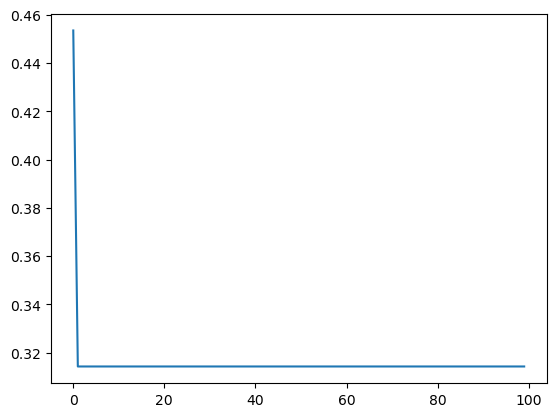

In [11]:
import matplotlib

x = range(num_iters)
y = cost_history
matplotlib.pyplot.plot(x,y)